# Exploration

This notebook is dedicated to exploring the SXSW Twitter dataset with an eye towards extracting brand-related sentiments.

## Bird's Eye View

I begin my exploratory analysis by trying to get an overall sense of what people were talking about regarding Apple and Google.

In [1]:
import json
from os.path import normpath
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

# Set Seaborn theme and default palette
sns.set_theme(font_scale=1.25, style="darkgrid")
sns.set_palette("deep", desat=0.85, color_codes=True)

# Turn on inline plotting
%matplotlib inline

# Load Black auto-formatter
%load_ext nb_black

# Enable automatic reloading
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [2]:
from tools import language as lang, plotting

# Set my default MPL settings
plt.rcParams.update(plotting.MPL_DEFAULTS)

<IPython.core.display.Javascript object>

In [3]:
df = pd.read_json(normpath("data/processed_tweets.json"))
df.head()

,text,object_of_emotion,emotion,clean_text,brand_terms,tagged,pos_tags,n_chars,n_words,avg_word_len,ep_count,qm_count
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,have iphone after tweet rise dead need upgrade...,[iphone],"[[., .], [@wesley83, NN], [I, PRP], [have, VBP...","[., NN, PRP, VBP, DT, CD, NN, ., IN, CD, NN, N...",104,29,3.586207,1,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iOS App,Positive,know about awesome ipad iphone app that you li...,"[ipad, iphone app]","[[@jessedee, NN], [Know, NNP], [about, IN], [@...","[NN, NNP, IN, NNP, ., NNP, NN, NNP, NN, NN, WD...",118,26,4.538462,0,1
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,cannot wait for ipad also they should sale the...,[ipad],"[[@swonderlin, NNS], [Can, MD], [not, RB], [wa...","[NNS, MD, RB, VB, IN, JJ, CD, RB, ., PRP, MD, ...",65,17,3.823529,0,0
3,@sxsw I hope this year's festival isn't as cra...,iOS App,Negative,hope this year festival ben crashy this year i...,[iphone app],"[[@sxsw, NN], [I, PRP], [hope, VBP], [this, DT...","[NN, PRP, VBP, DT, NN, NN, NN, RB, JJ, IN, DT,...",68,16,4.250000,0,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,great stuff fri marissa mayer google tim reill...,[google],"[[@sxtxstate, JJ], [great, JJ], [stuff, NN], [...","[JJ, JJ, NN, IN, NNP, NN, :, NNP, NNP, (, NNP,...",115,27,4.259259,0,0


<IPython.core.display.Javascript object>

In [4]:
with open(normpath("data/stopwords.json"), "r") as f:
    stopwords = json.load(f)

my_stop = stopwords["my_stop"]
brand_stop = stopwords["brand_stop"]
gensim_stop = stopwords["gensim_stop"]
nltk_stop = stopwords["nltk_stop"]
del stopwords

nltk_stop[:10]

['can', 'o', 'up', 'ain', 'more', 'too', "don't", 'the', 'you', 'mustn']

<IPython.core.display.Javascript object>

In [5]:
# Clean text containing the word 'apple'
mentions_apple = df.clean_text.loc[df.clean_text.str.contains("apple")]

# Clean text containing the word 'google'
mentions_google = df.clean_text.loc[df.clean_text.str.contains("google")]

mentions_apple.head()

9     count down the day plus strong canadian dollar...
20        need buy ipad while not sure need apple store
31    you must have this app for your ipad you http ...
36    the best first line for ipad pop apple store e...
39    vatornews google and apple force print medium ...
Name: clean_text, dtype: object

<IPython.core.display.Javascript object>

### Apple's Pop-up Store
Virtually all of the most robust quadgrams (according to the 'likelihood_ratio' metric) are about Apple's pop-up store where the iPad 2 is being launched. [This article](https://money.cnn.com/2011/03/11/technology/ipad_2_launch/index.htm) describes the crowd swarming for the launch.

In [6]:
apple_quad = lang.scored_quadgrams(
    mentions_apple,
    measure="likelihood_ratio",
    tokenizer=nltk.word_tokenize,
    stopwords=my_stop,
    min_freq=5,
)

apple_quad.head(20)

quadgram
apple open pop store             7641.421876
open pop store downtown          7483.101572
apple open temporary store       6864.424187
open temporary store downtown    6730.842501
open pop store for               6122.280478
set open pop store               6073.689262
apple open popup store           5581.155061
pop store downtown for           5497.547978
open temporary store for         5378.897553
open pop store that              5362.006360
have open pop store              5350.723440
apple pop store downtown         5134.940741
rumor apple open temporary       5090.936342
temporary store downtown for     5052.873473
apple open temp store            4823.419340
pop apple store downtown         4776.653123
apple open pop shop              4747.837216
open temp store downtown         4650.705065
not rumor apple open             4572.555290
pop store downtown pic           4435.201075
Name: score, dtype: float64

<IPython.core.display.Javascript object>

### Google Circles
The top quadrams about Google all have to do with the anticipated Google Circles launch.

In [7]:
google_quad = lang.scored_quadgrams(
    mentions_google,
    measure="likelihood_ratio",
    tokenizer=nltk.word_tokenize,
    stopwords=my_stop,
    min_freq=5,
)
google_quad.head(20)

quadgram
new social network call           19626.167802
major new social network          19142.906474
social network call circle        17447.770011
launch major new social           15962.116728
launch new social network         14236.214125
network call circle possibly      14203.573082
google new social network         14039.075642
new social network circle         14020.097781
secret new social network         13997.628443
reveal new social network         13964.745254
new social network today          13933.236316
social network call circles       13115.074996
call circle possibly today        13071.111388
social network google circle      12444.570753
google launch major new           12097.324938
major new social service          11307.857108
preview major new social          11303.169249
social network circle possibly    11090.956064
launch secret new social          10243.507399
network call circle today         10136.787451
Name: score, dtype: float64

<IPython.core.display.Javascript object>

There is no glaringly obvious pattern in the counts of 'Negative' and 'Positive' tweets for each brand. Talk about the new iPad leads in both the 'Negative' and 'Positive' categories, whereas Google leads in the 'Neutral' category.

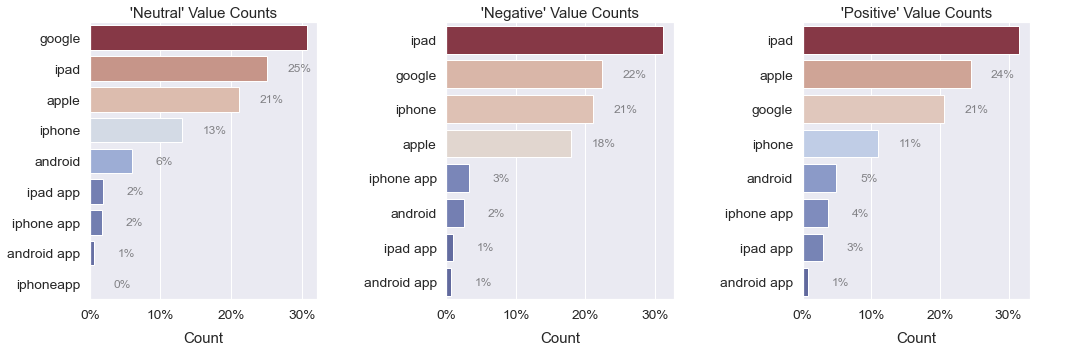

<IPython.core.display.Javascript object>

In [8]:
fig = plotting.countplot(
    df.explode("brand_terms").groupby("emotion")["brand_terms"],
    normalize=True,
)

A color palette for the sentiment classes.

In [9]:
emo_pal = dict(Negative="r", Neutral="gray", Positive="g")
emo_pal

{'Negative': 'r', 'Neutral': 'gray', 'Positive': 'g'}

<IPython.core.display.Javascript object>

It's fascinating how robust of a connection there is between exclamation points and positive sentiment. This is interesting to note for future sentiment analysis work.

Question marks are also pretty robustly non-positive. That makes sense intuitively.

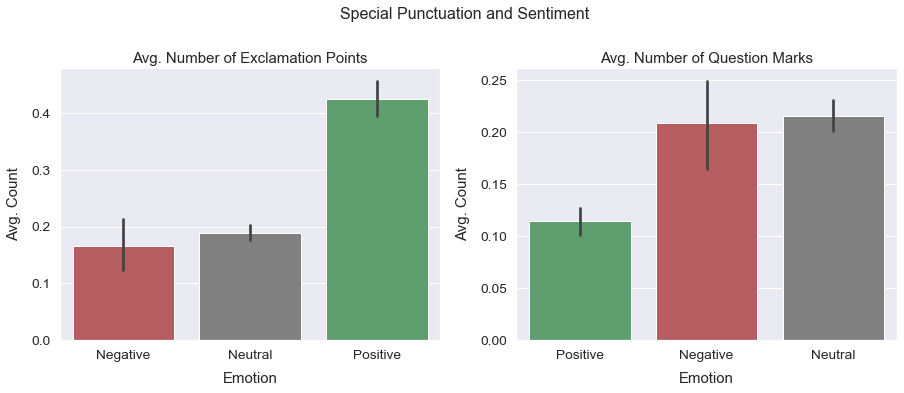

<IPython.core.display.Javascript object>

In [10]:
# Create plot objects
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

# Plot exclamation points on `ax1`
plotting.barplot(
    data=df,
    x="emotion",
    y="ep_count",
    palette=emo_pal,
    ax=ax1,
)

# Plot question marks on `ax2`
plotting.barplot(
    data=df,
    x="emotion",
    y="qm_count",
    palette=emo_pal,
    ax=ax2,
)

# Set `ax1` title and labels
ax1.set(
    title="Avg. Number of Exclamation Points",
    xlabel="Emotion",
    ylabel="Avg. Count",
)

# Set `ax2` title and labels
ax2.set(
    title="Avg. Number of Question Marks",
    xlabel="Emotion",
    ylabel="Avg. Count",
)

fig.suptitle("Special Punctuation and Sentiment", fontsize=16, y=1.05)

fig.savefig(normpath("images/punct_sentiment.svg"), bbox_inches="tight")

## Keywords by Brand

I construct "superdocuments" by grouping by 'emotion' and 'object_of_emotion' and concatenating the raw tweets in each group. Every brand/product will have 2 superdocuments: positive and negative.

In [11]:
brand_docs = (
    # Get Series where each value is a list of row indices
    pd.Series(df.groupby(["emotion", "object_of_emotion"]).groups)
    # Replace lists of row indices with sliced out tweets
    .map(lambda x: df.loc[x, "text"])
    # Fuse the tweets together
    .map(lambda x: " ".join(x))
)
# Get rid of Neutral group and swap index levels
brand_docs = brand_docs.drop(index=np.nan, level=1).swaplevel(0, 1)
brand_docs

Android               Negative    they took away the lego pit but replaced it wi...
Android App           Negative    Beware, the android #sxsw app for schedules is...
Apple                 Negative    Again? RT @mention Line at the Apple store is ...
Google                Negative    @mention  - False Alarm: Google Circles Not Co...
Other Apple Product   Negative    @mention I meant iTunes doesn't work for me (I...
Other Google Product  Negative    ���@mention Google to Launch Major New Social ...
iOS App               Negative    @sxsw I hope this year's festival isn't as cra...
iPad                  Negative    attending @mention iPad design headaches #sxsw...
iPhone                Negative    .@wesley83 I have a 3G iPhone. After 3 hrs twe...
Android               Positive    #SXSW is just starting, #CTIA is around the co...
Android App           Positive    Find &amp; Start Impromptu Parties at #SXSW Wi...
Apple                 Positive    Counting down the days to #sxsw plus stron

<IPython.core.display.Javascript object>

Now I use a `TfidfVectorizer` to extract tf-idf vectors for each superdocument. Each document is transformed into a vector of TF-IDF scores where the features are words. For each term in each superdocument, the score is (roughly) the term's local frequency times a measure of its rarity in the corpus as a whole. I set the 'max_df' to 0.3, meaning that terms which occur in more than 30% of the documents are excluded. This separates the wheat from the chaff.

In [12]:
filts = [
    lang.lowercase,
    lang.strip_handles,
    lang.uni2ascii,
    lang.wordnet_lemmatize,
    lang.strip_punct,
    lang.strip_numeric,
    lang.strip_short,
    lang.limit_repeats,
    lang.strip_multiwhite,
]

filts = lang.make_preprocessor(filts)
filts

functools.partial(<function chain_funcs at 0x0000017F28363B80>, funcs=[<function lowercase at 0x0000017F23C98820>, <function strip_handles at 0x0000017F23C98F70>, <function uni2ascii at 0x0000017F28363160>, <function wordnet_lemmatize at 0x0000017F28366D30>, <function strip_punct at 0x0000017F283631F0>, <function strip_numeric at 0x0000017F23C989D0>, <function strip_short at 0x0000017F23C988B0>, <function limit_repeats at 0x0000017F23C98B80>, <function strip_multiwhite at 0x0000017F23C98940>])

<IPython.core.display.Javascript object>

In [13]:
# Make vectorizer
tfidf = TfidfVectorizer(
    tokenizer=nltk.word_tokenize,
    stop_words=filts(my_stop + brand_stop + gensim_stop),
    preprocessor=filts,
    ngram_range=(1, 2),
    max_df=0.3,
    norm="l2",
)
# Make vectors
brand_vecs = tfidf.fit_transform(brand_docs.values)

# Place vectors in DataFrame
brand_vecs = lang.frame_doc_vecs(
    brand_vecs,
    tfidf.vocabulary_,
    brand_docs.index,
)

# Transpose so that vectors run along columns
brand_vecs = brand_vecs.T.sort_index(level=0, axis=1)

# Sort for effect
brand_vecs.sort_values(("Apple", "Negative"), ascending=False)

Android           Android App              Apple            \
                 Negative  Positive    Negative Positive  Negative  Positive   
fascist               0.0  0.000000         0.0      0.0  0.322995  0.000000   
fascist company       0.0  0.000000         0.0      0.0  0.276853  0.000000   
classy fascist        0.0  0.000000         0.0      0.0  0.184568  0.000000   
pop                   0.0  0.000000         0.0      0.0  0.183304  0.420909   
classy                0.0  0.000000         0.0      0.0  0.181745  0.000000   
...                   ...       ...         ...      ...       ...       ...   
giveaway force        0.0  0.000000         0.0      0.0  0.000000  0.000000   
giveaway confirm      0.0  0.000000         0.0      0.0  0.000000  0.000000   
giveaway come         0.0  0.000000         0.0      0.0  0.000000  0.000000   
giveaway bit          0.0  0.031632         0.0      0.0  0.000000  0.000000   
zzzs battery          0.0  0.000000         0.0      0.0  0.000000  0.000000   

                    Google           Other Apple Product           \
                  Negative  Positive            Negative Positive   
fascist           0.000000  0.000000                 0.0      0.0   
fascist company   0.000000  0.000000                 0.0      0.0   
classy fascist    0.000000  0.000000                 0.0      0.0   
pop               0.015095  0.000000                 0.0      0.0   
classy            0.000000  0.013706                 0.0      0.0   
...                    ...       ...                 ...      ...   
giveaway force    0.000000  0.000000                 0.0      0.0   
giveaway confirm  0.000000  0.000000                 0.0      0.0   
giveaway come     0.000000  0.000000                 0.0      0.0   
giveaway bit      0.000000  0.000000                 0.0      0.0   
zzzs battery      0.000000  0.000000                 0.0      0.0   

                 Other Google Product           iOS App               iPad  \
                             Negative Positive Negative Positive  Negative   
fascist                           0.0      0.0      0.0      0.0  0.000000   
fascist company                   0.0      0.0      0.0      0.0  0.000000   
classy fascist                    0.0      0.0      0.0      0.0  0.000000   
pop                               0.0      0.0      0.0      0.0  0.065327   
classy                            0.0      0.0      0.0      0.0  0.000000   
...                               ...      ...      ...      ...       ...   
giveaway force                    0.0      0.0      0.0      0.0  0.000000   
giveaway confirm                  0.0      0.0      0.0      0.0  0.000000   
giveaway come                     0.0      0.0      0.0      0.0  0.000000   
giveaway bit                      0.0      0.0      0.0      0.0  0.000000   
zzzs battery                      0.0      0.0      0.0      0.0  0.000000   

                              iPhone           
                  Positive  Negative Positive  
fascist           0.000000  0.000000      0.0  
fascist company   0.000000  0.000000      0.0  
classy fascist    0.000000  0.000000      0.0  
pop               0.362507  0.000000      0.0  
classy            0.000000  0.000000      0.0  
...                    ...       ...      ...  
giveaway force    0.007019  0.000000      0.0  
giveaway confirm  0.007019  0.000000      0.0  
giveaway come     0.028077  0.000000      0.0  
giveaway bit      0.000000  0.000000      0.0  
zzzs battery      0.000000  0.026531      0.0  

[21299 rows x 18 columns]

<IPython.core.display.Javascript object>

In [14]:
def plot_brand_clouds(
    column,
    dst,
    cmap=("Reds", "Greens"),
    size=(10, 4),
    ncols=1,
    max_font_size=110,
    random_state=156,
    brand_vecs=brand_vecs,
    **kwargs,
):
    fig = plotting.wordcloud(
        brand_vecs.loc[:, column],
        cmap=list(cmap),
        size=size,
        ncols=ncols,
        max_font_size=max_font_size,
        random_state=random_state,
        **kwargs,
    )
    fig.savefig(normpath(dst))
    return fig

<IPython.core.display.Javascript object>

### Apple

Here is one of the most striking Wordclouds in the notebook. It reveals that people were talking about Apple being a "fascist company". This began with tech journalist [Kara Swisher](https://en.wikipedia.org/wiki/Kara_Swisher), who provoked a flurry of tweets by saying that Apple was the "classiest fascist company in America".

On the positive side, a lot of people were talking about the pop-up store and circulating the following quote:

> apple comes up with cool technology no one's ever heard of because they don't go to conferences

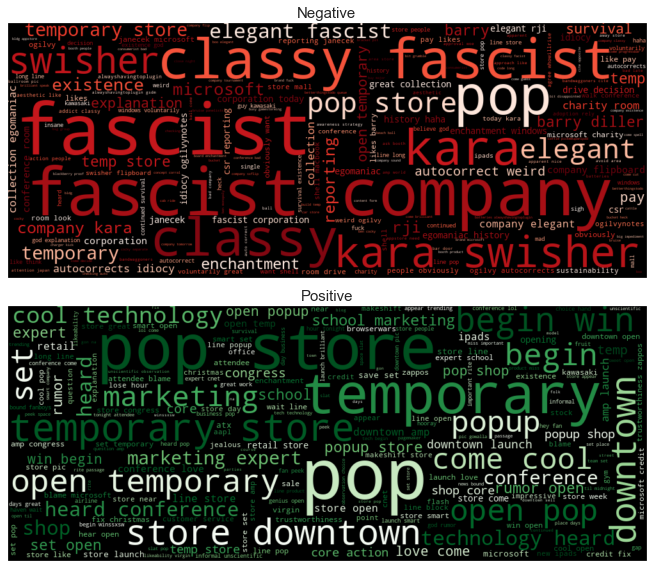

<IPython.core.display.Javascript object>

In [15]:
fig = plot_brand_clouds("Apple", "images/apple_clouds.svg")

### iPhone

Regarding the negative, there was a tweet bragging about T-Mobile, retweeted a few times:

> Looking forward to delicious T-Mobile 4G here in Austin while iPhone users struggle to do anything. #SXSW

There were similar remarks about AT&T's service making iPhone's useless as a brick:
> Austin is getting full, and #SXSW is underway. I can tell because my iPhone is an intermittent brick. #crowded

> Decided to go to LA instead of #SXSW, because my AT&T iPhone would be about as useful as a brick in Austin.

There was also talk about battery life problems.

> #sxsw is exposing my iphone's horrendous battery life.

> This #SXSW I am grateful for: my bicycle, having a back-up Twitter app. Cursing: losing an hour of zzzs, iPhone battery life.

> Disgusted with my iPhone's battery life. Already down to 11% at 3:30 pm while my blackberry is going strong. #Sxsw

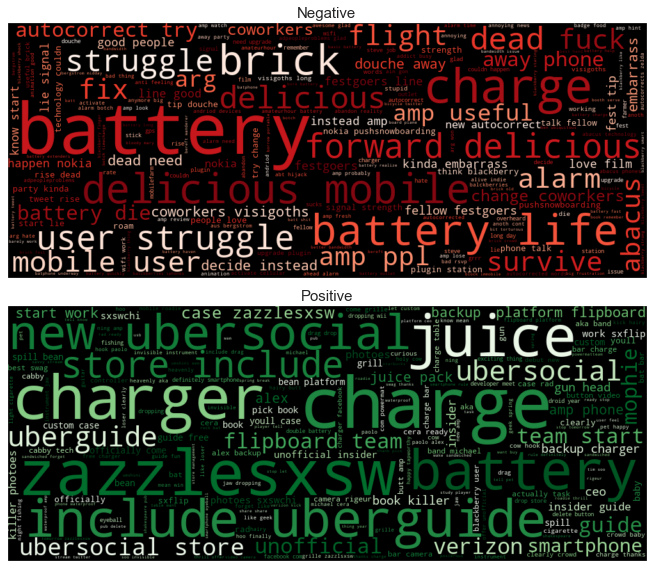

<IPython.core.display.Javascript object>

In [16]:
fig = plot_brand_clouds("iPhone", "images/iphone_clouds.svg")

Many positive tweets seem to be about how glad people are to have a charger.

The positive chatter about [Flipboard](https://flipboard.com/) was related to its well-designed iPad app.

> Epicurious, flipboard, CNN, wired, and MOMA as examples of good iPad design #SXSW {link}

The talk about [Zazzle](https://www.zazzle.com/) was related to designing custom iPhone cases, a service they offer.

> Zazzle is gearing up to hit #SXSW! Look out for our tweets on where you can come by to create your own iPhone case! #zazzlesxsw

There are some positive tweets about the newly-available **Verizon iPhones** and their superior service.

### iPad
The talk about "design headaches" is related to a talk given by Josh Clark on the topic of iPad design challenges and failings. It seems like constructive criticism which is not intended to harm the brand.

The talk about "japan relief" has to do with the following virally circulated quote:

> Best thing I've heard this weekend at #SXSW "I gave my iPad 2 money to #Japan relief. I don't need an iPad 2."

The quote expresses a definite negative attitude towards Apple and iPad, which it implies are associated with self-indulgence and excess.

The positive chatter is again focused on the pop-up store, with words like "shiny", "gadget", and "envy" showing up.

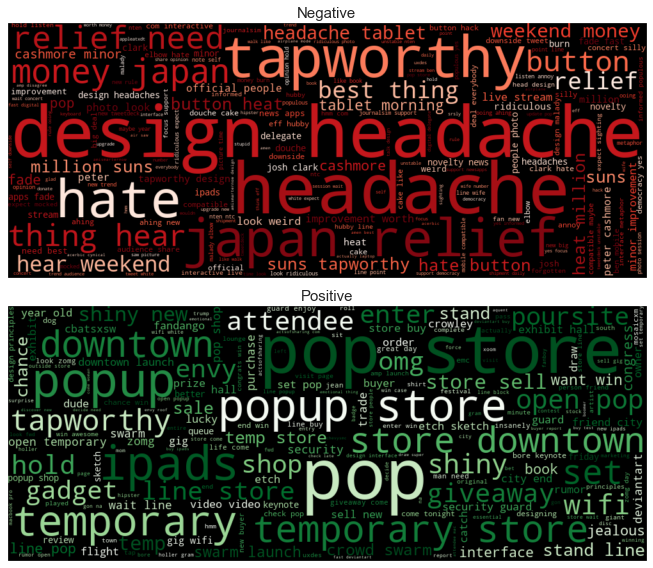

<IPython.core.display.Javascript object>

In [17]:
fig = plot_brand_clouds("iPad", "images/ipad_clouds.svg")

### iOS Apps

The negative chatter seems to focus on the short lifecycle of news apps, and is related to [this article](https://www.theguardian.com/technology/pda/2011/mar/15/sxsw-apple-ipad-news-apps) from the time period.

There are some complaints about apps using geolocation eating up battery life.

Holler Gram was a social media app which existed for use at South by Southwest, according [this article](https://www.forbes.com/sites/billbarol/2011/03/07/holler-gram-is-here/?sh=454ea1ed2a60).

These wordclouds don't seem to be as interesting as some of the others.

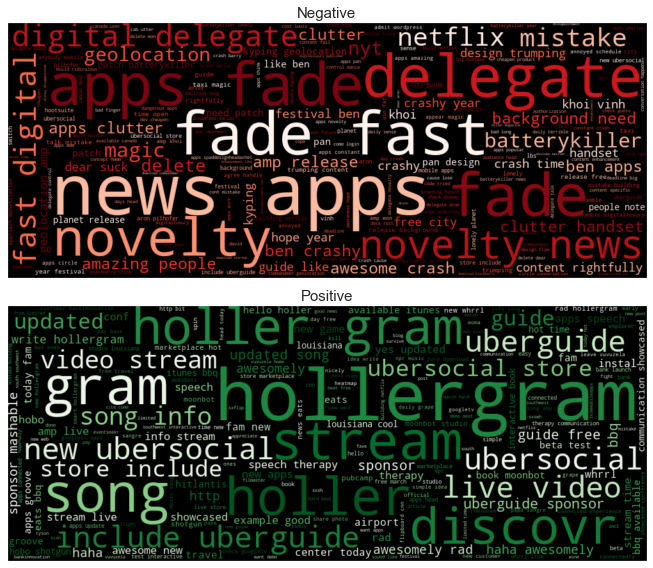

<IPython.core.display.Javascript object>

In [18]:
fig = plot_brand_clouds("iOS App", "images/ios_app_clouds.svg")

### Google

There appears to have been a Guardian article going around titled "The #Google and #Bing smackdown in all its bloody banality".

People were saying things like:

> So true!!! RT @mention 'Google lost its way by caring too much for the business vs. the users' - @mention #psych #sxsw

People seemed to be excited about a talk given by [Marissa Mayer](https://en.wikipedia.org/wiki/Marissa_Mayer). They were also anticipating the launch of Google Circles.


This mantra was being virally tweeted.

> RT @mention ���@mention "Google before you tweet" is the new "think before you speak." - Mark Belinsky, #911tweets panel at #SXSW.�۝

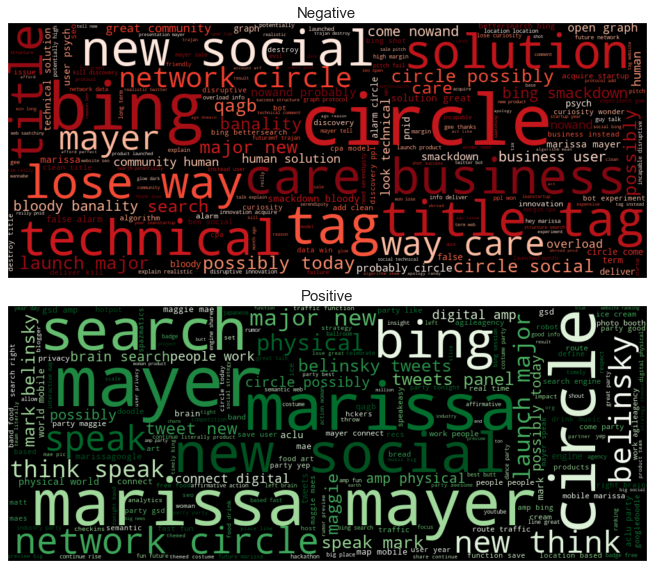

<IPython.core.display.Javascript object>

In [19]:
fig = plot_brand_clouds("Google", "images/google_clouds.svg")

### Android

The most interesting phrase here is "apps like ipod", which appears to originate from the following tweet:

 > @mention Android needs a way to group apps like you can now do with iPad/iPod. #SXSW #hhrs
 
There is also talk about bugginess, as in:

> Is it just me or has the @mention client for Android gotten really buggy lately? #SXSW to blame?

This is good news for Apple.

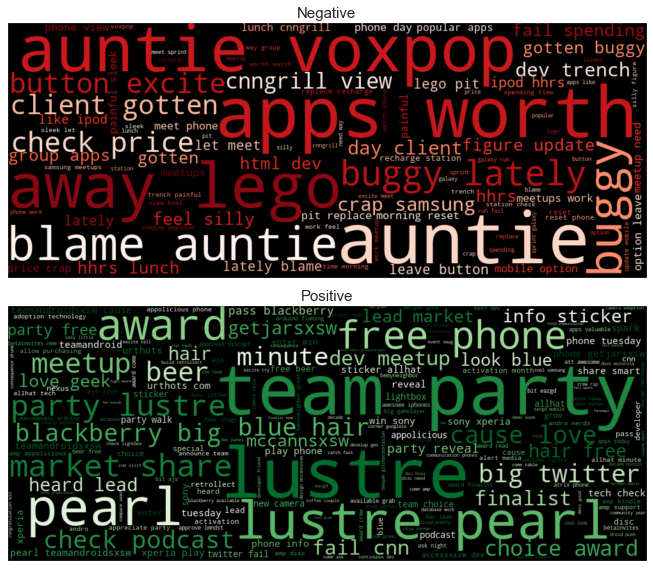

<IPython.core.display.Javascript object>

In [20]:
fig = plot_brand_clouds("Android", "images/android_clouds.svg")

### Android Apps

There were some complaints about the specific South by Southwest Android app.

> Beware, the android #sxsw app for schedules is completely innacurate. Just walked to the hyatt for no reason #sxswfail

A few people tweeted about this, although it doesn't seem particularly juicy:

> 95% of iPhone and Droid apps have less than 1,000 downloads total. #SXSW

There was a lot of cheering for Gowalla's app winning the Team Android Choice Awards:

> Nice! RT @mention Yes! Gowalla wins best Andoid app at the Team Android Choice Awards. Thanks all! #sxsw

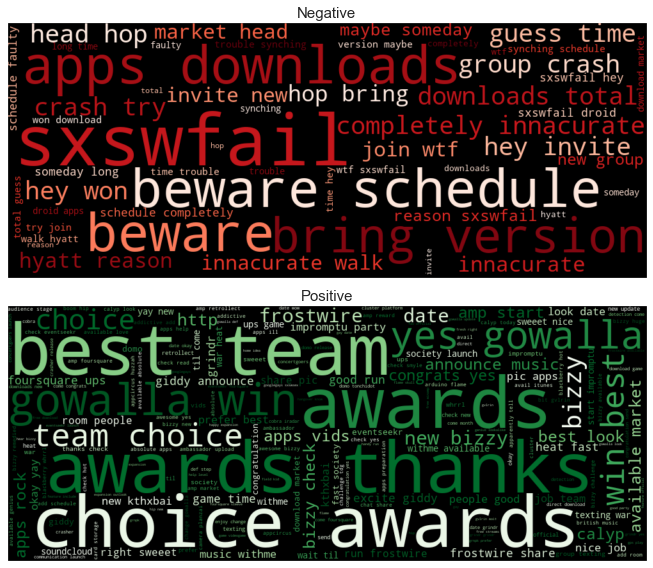

<IPython.core.display.Javascript object>

In [21]:
fig = plot_brand_clouds("Android App", "images/android_clouds.svg")